# Домашнее задание по статистическому анализу на python

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [5]:
# fill gaps
df = df.fillna(method='ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            156 non-null float64
Negative affect            156 non-null float64
Social support             156 non-null float64
Freedom                    156 non-null float64
Corruption                 156 non-null float64
Generosity                 156 non-null float64
Log of GDP
per capita      156 non-null float64
Healthy life
expectancy    156 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Сначала неплохо бы разобраться, что за данные нам достались. Оригинальный отчет доступен по ссылке https://s3.amazonaws.com/happiness-report/2019/WHR19.pdf . В поисках дополнительной информации наткнулся на такой анализ: https://www.kaggle.com/qwp8510/world-happiness-report-2019-analysis . Данные в таблице представляют собой места, которые страна занимает по каждому показателю, поэтому распределение всегда равномерное. Очень похоже, что данная трансформация теряет некоторую информацию - от случайных величин с нормальным распределением мы переходим к равномерным и не совсем случайным величинам (в моем понимании у случайной величины должна быть возможность принять повторяющиеся значения выборки). Я нашел оригинальные сырые данные тут https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls и буду использовать их далее (вместе с данными отчета, для сравнения) при выполнении задания.

In [6]:
my_url = 'https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls'
my_df = pd.read_excel(my_url)

In [7]:
my_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Remove unneeded columns
my_df = my_df[my_df.columns[:11]]
my_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919


In [9]:
my_df[ my_df.Year == 2018 ].isnull().sum()
#Плохие данные по коррупции в Китае, Иордании, Саудовской Аравии, Туркмении, Эмиратах. 
# ПРоблема с данными в Северном Кипре, Тайване (проще удалить), 
#неизвестна продолжительность жизни в Палестине (проще удалить)

Country name                         0
Year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       0
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                          10
Perceptions of corruption            7
Positive affect                      1
Negative affect                      1
dtype: int64

In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 11 columns):
Country name                        1704 non-null object
Year                                1704 non-null int64
Life Ladder                         1704 non-null float64
Log GDP per capita                  1676 non-null float64
Social support                      1691 non-null float64
Healthy life expectancy at birth    1676 non-null float64
Freedom to make life choices        1675 non-null float64
Generosity                          1622 non-null float64
Perceptions of corruption           1608 non-null float64
Positive affect                     1685 non-null float64
Negative affect                     1691 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.5+ KB


In [11]:
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'Palestinian Territories'].index )

In [12]:
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'North Cyprus'].index )

In [13]:
my_df = my_df.drop( my_df.loc[my_df['Country name'] == 'Taiwan Province of China'].index )

In [14]:
#Filling data with previous value and grab year 2018
my_df = my_df.fillna(method='ffill')
my_df = my_df[ my_df.Year == 2018]
my_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
21,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
28,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
45,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
58,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


In [15]:
my_df = my_df.drop(columns = 'Year')
my_df = my_df.rename(columns = {'Country name':'Country (region)', 'Life Ladder':'Ladder', 
                                'Healthy life expectancy at birth':'Healthy life expectancy', 'Freedom to make life choices':'Freedom',
                               'Perceptions of corruption':'Corruption'})
my_df.head()

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
10,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
21,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
28,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
45,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
58,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


In [18]:
my_df = my_df.reset_index()
my_df = my_df.drop(columns = 'index')

my_df.head()

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
2,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
3,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
4,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

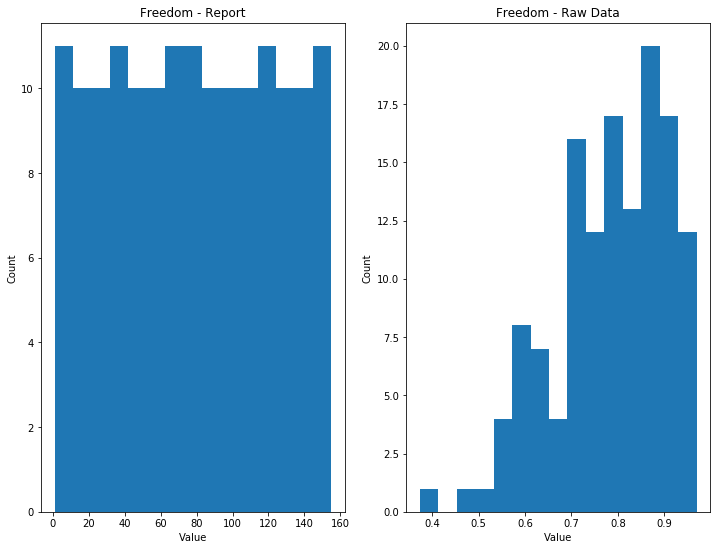

In [36]:
plt.subplot(1,2,1)
plt.hist(df.Freedom, 15)
plt.title('Freedom - Report')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(my_df.Freedom, 15)
plt.title('Freedom - Raw Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

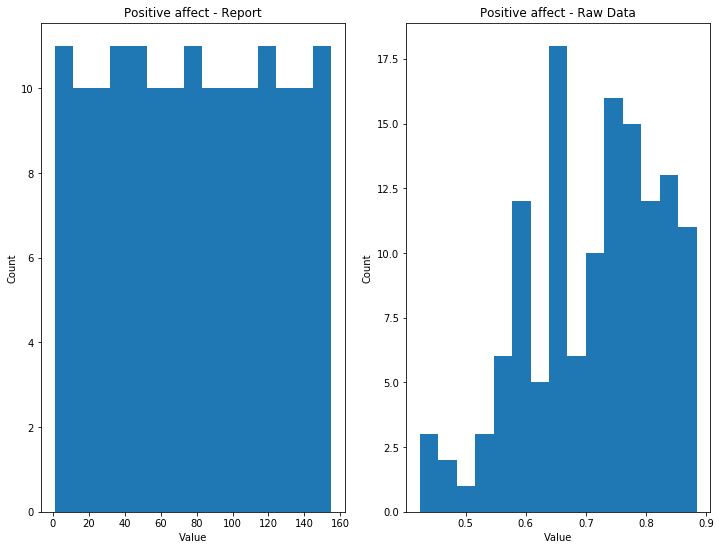

In [37]:
plt.subplot(1,2,1)
plt.hist(df['Positive affect'], 15)
plt.title('Positive affect - Report')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(my_df['Positive affect'], 15)
plt.title('Positive affect - Raw Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

В файле отчета распределение равномерное. Вернее, каждое значение там уникальное. В сырых данных распределение обоих параметров похоже на нормальное, но возможны и варианты. Например - Пуассон тоже похож. Надо дополнительно исследовать.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [38]:
# Так как у нас все значения уникальны в столбце Freedom (в обоих фреймах, в первом по дизайну, 
#во втором действительные числа, то понятие моды неприменимо. Команда statistics.mode(df.Freedom) выдает ошибку, \
# что все значения уникальны

In [22]:
temp = df.describe()['Freedom']
print(f"""Оригинальный файл
      Медиана - {temp['50%']}
      Математическое ожидание - {temp['mean']}
      Стандартное отклонение - {temp['std']}
      Дисперсия - {temp['std']**2}
      Минимум - {temp['min']}
      Максимум - {temp['max']}
      Размах - {temp['max']-temp['min']}""")


Оригинальный файл
      Медиана - 77.5
      Математическое ожидание - 77.93589743589743
      Стандартное отклонение - 44.750877372863044
      Дисперсия - 2002.6410256410256
      Минимум - 1.0
      Максимум - 155.0
      Размах - 154.0


In [23]:
temp = my_df.describe()['Freedom']
print(f"""Сырые данные
      Медиана - {temp['50%']}
      Математическое ожидание - {temp['mean']}
      Стандартное отклонение - {temp['std']}
      Дисперсия - {temp['std']**2}
      Минимум - {temp['min']}
      Максимум - {temp['max']}
      Размах - {temp['max']-temp['min']}""")

Сырые данные
      Медиана - 0.7970568537712097
      Математическое ожидание - 0.7857451795187211
      Стандартное отклонение - 0.11854212806935287
      Дисперсия - 0.014052236127210857
      Минимум - 0.37353554368019104
      Максимум - 0.969897985458374
      Размах - 0.596362441778183


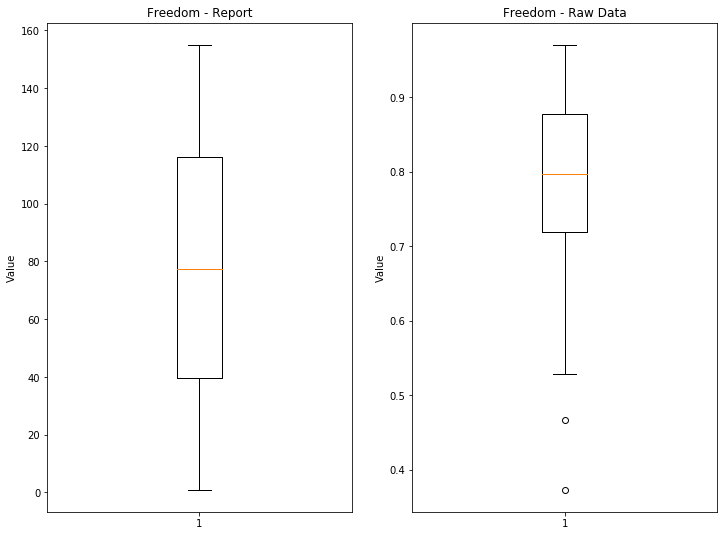

In [39]:
plt.subplot(1,2,1)
plt.boxplot(df['Freedom'])
plt.title('Freedom - Report')
plt.ylabel('Value')
# plt.ylabel('Count')

plt.subplot(1,2,2)
plt.boxplot(my_df['Freedom'])
plt.title('Freedom - Raw Data')
plt.ylabel('Value')
# plt.ylabel('Count')
plt.show()

In [25]:
# В сырых данных есть два выброса у столбца Freedom
my_df.loc[ my_df.Freedom < 0.5]

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
76,Mauritania,4.313615,8.196549,0.801596,57.000000,0.466889,-0.095451,0.710529,0.663382,0.275558


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

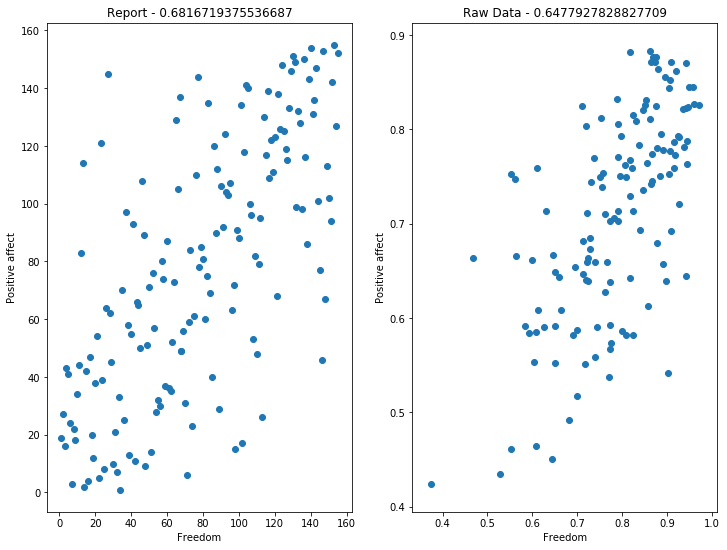

In [40]:
corr, pvalue = sts.pearsonr(df['Freedom'], df['Positive affect'])
plt.subplot(1,2,1)
plt.scatter(df['Freedom'], df['Positive affect'])
plt.title(f'Report - {corr}')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')

corr, pvalue = sts.pearsonr(my_df['Freedom'], my_df['Positive affect'])
plt.subplot(1,2,2)
plt.scatter(my_df['Freedom'], my_df['Positive affect'])
plt.title(f'Raw Data - {corr}')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

Коэффициент корреляции большой, значит величины связаны. Знак корреляции показывает, происходит ли уменьшение или увеличение одной случайной величины в зависимости от значеня другой

Во всех источниках указывают, что корреляция Пирсона работает только для нормально распределенных С.В. В нормальности распределения значений у меня большие сомнения (в оригинальном файле - точно не нормальные). Попробуем посчитать корреляцию Спирмена

In [41]:
corr, pvalue  = sts.spearmanr(df['Freedom'], df['Positive affect'])
print(f'Коэффициент корреляции Спирмена для данных из отчета {corr}')

corr, pvalue  = sts.spearmanr(my_df['Freedom'], my_df['Positive affect'])
print(f'Коэффициент корреляции Спирмена для сырых данных {corr}')

Коэффициент корреляции Спирмена для данных из отчета 0.6815502861505053
Коэффициент корреляции Спирмена для сырых данных 0.6400057130614868


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [42]:
temp = df.describe()['Freedom']
df['Freedom Norm'] = (df['Freedom'] - temp['mean']) / (temp['max'] - temp['min'])
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Freedom Norm
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,-0.473610
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,-0.467116
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,-0.486597
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,-0.460623
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,-0.382701


In [43]:
temp = my_df.describe()['Freedom']
my_df['Freedom Norm'] = (my_df['Freedom'] - temp['mean']) / (temp['max'] - temp['min'])
my_df.head()

,Country (region),Ladder,Log GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect,Freedom Norm
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,-0.691207
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.064503
2,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,-0.339332
3,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.100861
4,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.036720


Построить матрицу корреляций для всех колонок таблицы

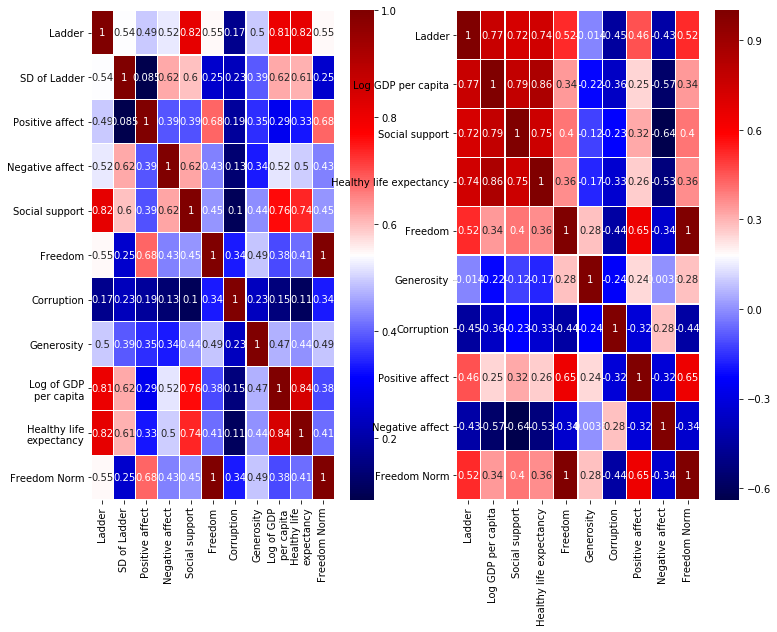

In [44]:
import seaborn as sns

plt.subplot(1,2,1)
sns.heatmap(df.corr(),annot=True,cmap='seismic',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
# fig.set_size_inches(12,12)

plt.subplot(1,2,2)
sns.heatmap(my_df.corr(),annot=True,cmap='seismic',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()

plt.show()

Загрузить следующую таблицу: 

In [45]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [46]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Сделать частотный график колонки AveragePrice. Какое это распределение?

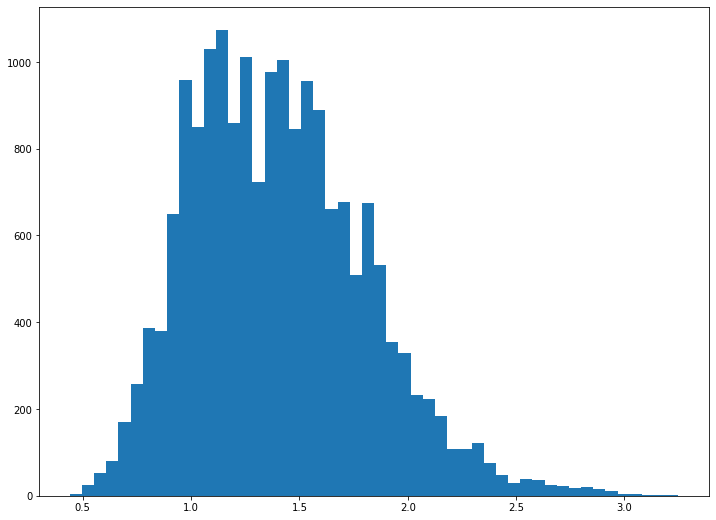

In [47]:
n, bins, patches = plt.hist(df['AveragePrice'],50)
plt.show()

Average price имеет нормальное распределение

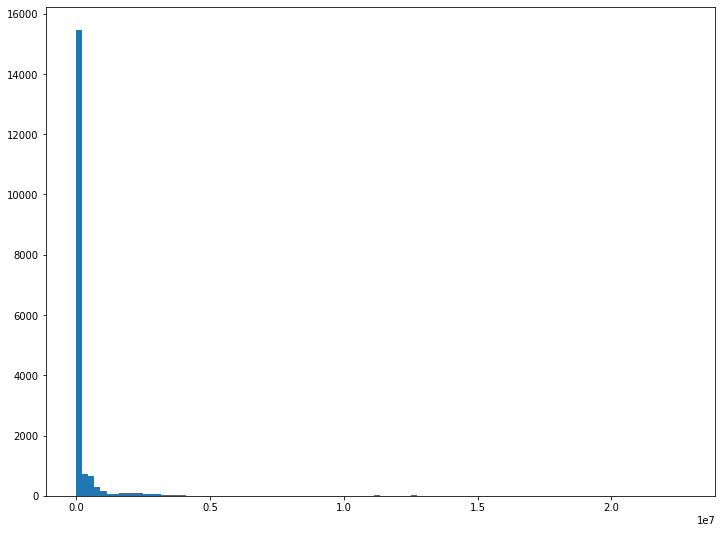

In [48]:
n, bins, patches = plt.hist(df['4046'],100)
plt.show()

Столбец с типом 4046 точно обладает не нормальным распределением. Очень похоже на логнормальное распределение. И вот тут расчет корреляций двумя разными способами приводит к разным результатам.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

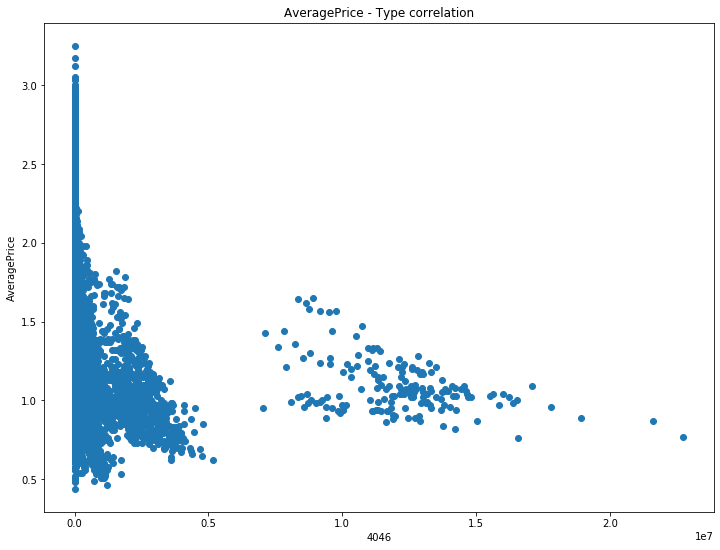

In [51]:

plt.scatter(df['4046'], df['AveragePrice'])
plt.title(f'AveragePrice - Type correlation')
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.show()

In [50]:
corr, pvalue = sts.spearmanr(df['4046'], df['AveragePrice'])
print(f'Коэффициент корреляции Спирмена - {corr}')
corr, pvalue = sts.pearsonr(df['4046'], df['AveragePrice'])
print(f'Коэффициент корреляции Пирсона - {corr}')
print('То есть, по Пирсону С.В. не связаны, а вот по Спирмену обладают достаточно сильной отрицательной корреляцией')

Коэффициент корреляции Спирмена - -0.5961701841279068
Коэффициент корреляции Пирсона - -0.20831704848788477
То есть, по Пирсону С.В. не связаны, а вот по Спирмену обладают достаточно сильной отрицательной корреляцией
